<h2> ====================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 1: General Overview</h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 <br>
 United States Military Academy, West Point, AY20-2
<h2>=====================================================</h2>

<h2> Lecture Outline</h2>
<html>
<ol>
    
  <li><b>Notation</b></li>
  <br>
  <li> <b>What is Machine/Statistical Learning?</b></li>
  <br>
  <li><b> Why's and How's of Estimating the Relationship Between <font color='red'> Predictors </font> and <font color='red'> Response</font></b></li>
  <br>
  <li> <b> Prediction Accuracy and Model Interpretability Trade-Off</b></li>
  <br>
  <li><b> Supervised vs. Unsupervised Models</b></li>
  <br>
  <li><b> Regression vs. Classification Models </b></li>
  <br>
  <li><b> Assesing Model Accuracy</b>
     <ol>
        <li> Mean Squared Error (MSE)</li>
        <li> Confusion Matrix</li>
        <li> ROC Curve </li>
        <li> Cross-Validation</li>  
     </ol>
    </li>
   <br>
<li><b> Bias-Variance Trade-Off</b></li>
</ol>

 <hr>
 
 <hr>

<h2>Notation</h2>


<ul>

   <li> $X$: predictors, features, independent variables</li>
    <li> $Y$: response, target, dependent variable</li>
   <li> $p$: number of predictors</li>
   <li> $n$: number of samples </li>  

</ul>


<br>
<h2>What is Machine/Statistical Learning?</h2>
<br>
We will use the terms <i> Statistical Learning</i> and <i> Machine Learning</i> interchangeably.
 
<ul>   
    
<li>Roughly spekaing, Machine Learning refers to a set of methods for estimating the systematic information that the <i> predictors/features</i>, denoted by $X$, provide about the <i> response</i>, denoted by $Y$.</li>
    
<li> Equivalently: it is a set of approaches for estimating the relationship between the <i> predictor variables </i> and the <i> response variable</i></li>

<br>
Specifically, suppose that we observe some quantitative response $Y$ and collect $p$ different features $X_1,\dots, X_p$ that we believe to be related to the response $Y$. Letting $X=(X_1,\dots, X_p)$ then we have 
    
$$Y=f(X)+\epsilon$$
    
 where $f$ represents the relationship or systematic information that the predictors $X$ provide about the response $Y$, and $\epsilon$ represents some random error term <b>independent</b> of $X-$ this stems from the fact that $Y$ may depend on other factors that are not among the $p$ features $X$. 
<br>

So, roughly speaking, Machine Learning refers to all the different methods of estimating this $f$.
<br>
     
We will illustrate this with some examples below.



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Mock Example 1</h3>

Let

<ul>
    <li>$Y$: be yearly income</li>
    <li> $X_1$: years of education post fith grade</li>
    <li>$X_2$: height of the person</li>
 </ul>

Suppose we are interested in 

<ul>
    <li>Predicting $Y$ based on $X=(X_1,X_2)$ and
    <li> Understading how each of $X_1$ and $X_2$ is related to and affects $Y$. 
</ul>

<b>Remark:</b> Don't worry about the code for now.


In [9]:
# x=np.linspace(4,17,40)
# y=100/(1+np.exp(-x+10))+40
# y_noise=np.random.normal(0,15,40)
# x2=np.linspace(4,6.7,40)
# np.random.shuffle(x2)
# y_out=y+y_noise

In [10]:
# income=pd.DataFrame({"X1":x.round(3), 'X2':x2.round(3), 'Y':y_out})

In [11]:
#This is what the information about the first 10 people look like
income.head()

,X1,X2,Y
0,4.000,4.900,68.443765
1,4.333,6.008,37.107402
2,4.667,5.315,44.465165
3,5.000,5.523,47.065389
4,5.333,6.146,62.658630


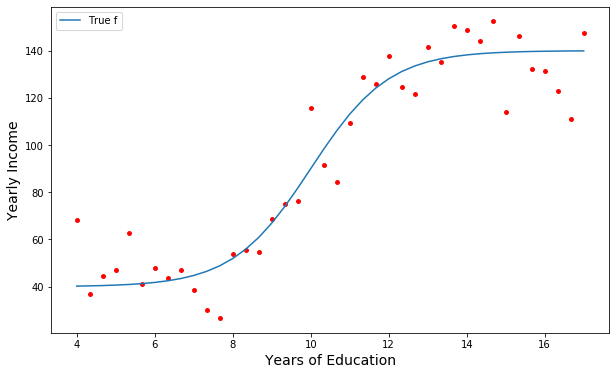

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(income['X1'],income['Y'],edgecolor='red',c='red',s=15)
plt.plot(x,y, label='True f')
plt.xlabel("Years of Education",fontsize=14)
plt.ylabel("Yearly Income",fontsize=14)
plt.legend(loc=2)
plt.show()

Since, in this mock case, the <b>Income</b> is a simulated data set, we know precisely how years of education is related to the yearly income. In other words, we know exactly what the function $f$ is (the blue curve above). However, 
in practice $f$ is not known, and our goal will be to find a good estimate $\widehat f$ of $f$.
<br>

Another important question that one often wants to answer in practice is which features are most strongly related to the response and would they make a good predictor? Are there any features that seem not to carry any information about $Y$ at all? If so, which? etc. etc. etc.

For example, in our mock case, <b> height</b> seems not to carry any information regarding the persons yearly income(it would be weird if it did!). See the plot beow.

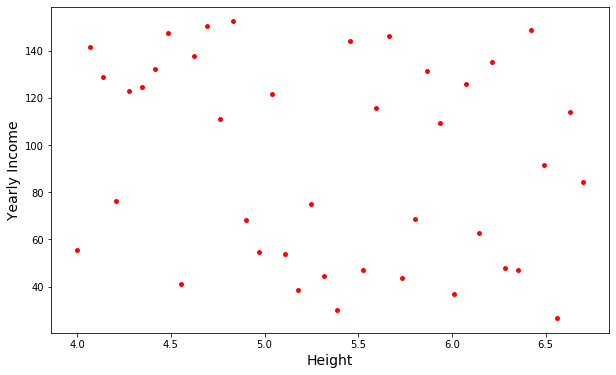

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(income['X2'],y_out, c='red', s=15)
plt.xlabel('Height',fontsize=14)
plt.ylabel("Yearly Income",fontsize=14)
plt.show()

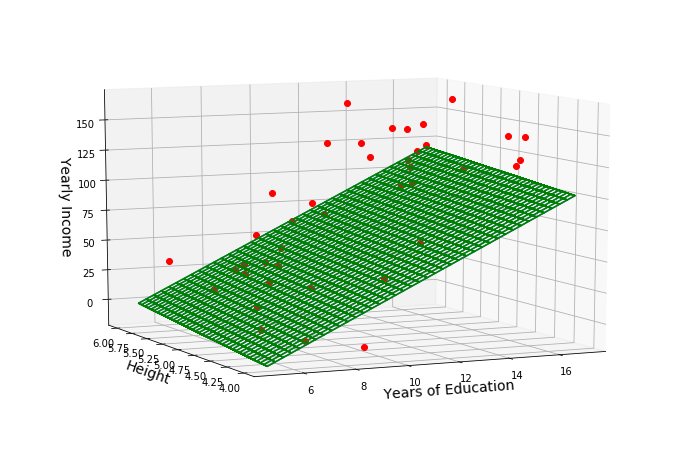

In [16]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection="3d")

def z_function(x1, x2):
    return 10*x1+8*x2-100

x1=np.linspace(5,17,40)
x2=np.linspace(4,6,40)

np.random.shuffle(x2)

X, Y = np.meshgrid(x1, x2)
Z = z_function(X, Y)

Y_target=100/(1+np.exp(-x+10))+30+np.random.normal(0,20,40)+np.sqrt(x2)


ax.plot_wireframe(X,Y,Z)

ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('Years of Education',fontsize=14)
ax.set_ylabel('Height',fontsize=14)
ax.set_zlabel('Yearly Income',fontsize=14)

for i in range(len(x1)):
    
    ax.plot([x1[i]],[x2[i]],[Y_target[i]],marker='o',color='r')

ax.set_xlabel('Years of Education',fontsize=14)
ax.set_ylabel('Height',fontsize=14)
ax.set_zlabel('Yearly Income',fontsize=14)

ax.view_init(10,245)
plt.show()



<h2> Why do we want to estimate $f$ ?</h2>


  Typically there are two main reasons why it is of interest to estimate $f$: <b> prediction</b> and <b>inference</b>.
  
<ul>
  
   <li><h3>Prediction</h3></li>
    
 In many situations we can get a hold of the features for a particular target, but obtaining the value of the target variable is difficult and often impossible.
  
For example, imagine you want to know whether a patient will have a severe adverse reaction to a particular drug. One, albeit very undesirable, way to figure that out is by administering the drug and observing the effect. However, if the patient has an adverse reaction which may cause damges, the hospital is liable for a lawsuit etc. So, you want to figure out a way to determine if the patient will have an adverse reaction to the drug based say on some blood characteristics, $X_1,\dots, X_p$. These blook markers may be readily obtained in the lab!
  
  So, in this case we may predict $Y$ by using $$\widehat Y=\widehat f(X)$$
  where $\widehat f$ is some estimate of $f$, and $\widehat Y$ is the resulting prediction for $Y$.
  
  How accurate our estimate $\widehat Y$ is depends on two factors:
<ul>
   <li><b> Reducible Error</b></li>

 This error stems from the fact that our estimate $\widehat f$ of $f$ may not be perfect. However,
 since we may potentially get a better estimate of $f$ via another method, this erros is called <b> reducible</b>, as it may be further reduced.
 
<br>
  <li><b>Irreducible Error</b></li>
   
 This error stems from the fact that there may be other features, outside of $X=(X_1,\dots, X_p)$ that we have not measured, but that may play an important role in predicting $Y$. In other words, even if we could find a perfect estimate $\widehat f$ of $f$, that is $\widehat Y=f(X)$, there will still be some inherent error in the model for the simple fact that the features $X_1,\dots, X_p$, that we have measured, are just not sufficient for a perfect prediction of $Y$.  
 
</ul>
  
Typically, when one is exclusively interested in prediction, then the specific form of $f$ is of little to no importance, and it is taken as a <b>black box</b>.

<li><h3> Inference</h3></li>


 In practice we are often not so much interested in building the best prediction model, but rather in understanding specifically how $Y$ is affected as the features $X_1,\dots, X_p$ change. 
 
 In inference problems, the estimated $\widehat f$ may no longer taken as a black box, but rather needs to be understood well.
    
Some questions of interest that we would want to answer are as follows:
<ul>
<li>Which predictors are associated with the response?</li>
    
<li>What is the relationship between each response and the predictor? Positive, negative, more complex?</li>
<li>Is the relationship between predictors and response linear or more complex?</li>
</ul>
<br>
Discuss the <b> Income</b> and the <b> Drug Adverse Reaction</b> cases from this perspective.
</ul>



<h2> How is $f$ Estimated?</h2>

<br>

To estimate $f$ you need data...often a lot of data...that will train or teach our method how to estimate $f$. The data used to train our method is refered to as <b> training data</b>.

For example, if $x_i=(x_{i1},x_{i2},\dots, x_{in})$ for $i=1,2,\dots,n$ is the $i^{th}$ observation and $y_i$ the response associated with it, then the <b>training data </b> consists of 

$$\big\{(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)\big\}.$$

There is an ocean of linear and non-linear methods of estimating $f$. Overall, they can be split into two categories: <br><b> parametric</b> and <b> non-parametric</b> methods.


<ul> 
    
   <li><h3> Parametric Methods</h3></li>
<br>
   <b> Step 1:</b> Assume the form of $f$<br>
    
  For example, one of the simplest assumptions we can make is that $f$ is linear, that is:
  
  $$f(X)=\beta_0+\sum_{i=1}^n\beta_iX_i$$
  
  <b> Step 2:</b> Estimate the coefficients $\{\beta_i\}_{i=0}^n$
  
  Next, you need to use the training data and select a procedure to estimate the coefficients $\beta_0,\beta_1,\dots, \beta_n$; that is find $\widehat \beta_0,\dots,\widehat \beta_n$ such that $$\widehat Y=\widehat \beta_0+\sum_{i=1}^n\widehat \beta_i X_i$$
   
One of the main <b>advantages</b> of parametric methods is that the problem is transformed from estimating an arbitrary and unknown $f$ to estimating a set of parameters, which in general is much easier to do and requires less data!

One of the main <b>disadvantages</b> of parametic methods is that the assumption that you make about the form of $f$ often may not closely match the true form of $f$, which may lead in poor estimates.

<b> Examples of parametric methods include:</b>
<ul>
    <li> Simple Linear Regression (Least Squares)</li>
    <li> Lasso & Ridge Regression</li>
    <li> Logistic Regression </li>
    <li> Neural Nets etc.</li>
</ul>


<li><h3> Non-Parametric Methods</h3></li>
<br>
Non-parametric methods do not make any assumptions on the form of $f$, but rather try to estimate it by trying to approximate as closely and as smoothly as possible the training data.

One of the main <b>advantages</b> of non-parametric approaches is that because they do not make any assumptions on the form of $f$ they can accomodate a wide range of possibilities, and as such stand a better chance of approaching the true form of $f$, and as such may have better prediction power.

One of the main </b>disadvantages</b> is that they typically require far more training data than parametric methods to successfully and correctly estimate $f$ and may be prone to overfitting.

<b> Examples of non-parametric methods include:</b>
<ul>
    <li> Decision Trees </li>
    <li> K-Nearest Neighbor </li>
    <li> Support Vector Machines etc.</li>
</ul>
    

</ul>

<hr>
<hr>

<h2> Prediction Accuracy vs. Model Interpretability</h2>

As a rule of thumb, the less flexible a model is the more interpretable it may be, and vice versa, the more flexible a model is the less interpretable it may be!

For a pictorial view of where some of the models fall see Fig 1. below.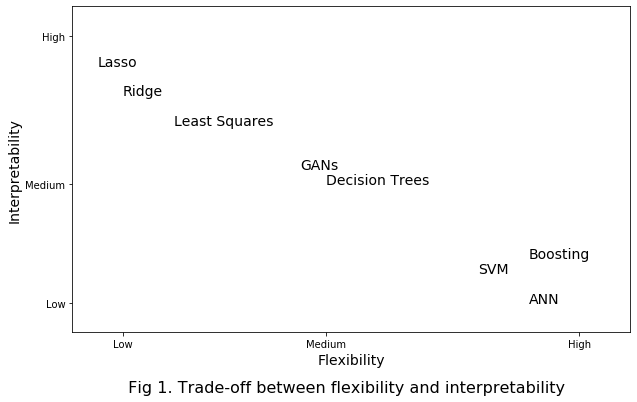

<br>
<hr>
 <b> Remark:</b> You may ignore this part for now, but if interested, below is the code I used to generate the graph above: 

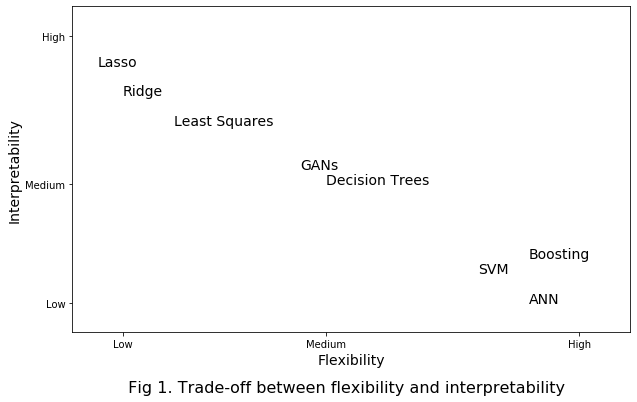

In [122]:
models={'Lasso':(0.05,0.9), 'Ridge':(0.1,0.8), 'Least Squares':(0.2,0.7),'GANs':(0.45,0.55),
        'Decision Trees':(0.5,0.5),'SVM':(0.8,0.2),'Boosting':(0.9,0.25), 'ANN':(0.9,0.1)}

plt.figure(figsize=(10,6))

for item,val in zip(models.keys(),models.values()):
    plt.text(val[0],val[1],item, fontsize=14)

    
plt.xticks([0.1,0.5,1], ('Low','Medium','High'))
plt.yticks([0.1,0.5,1], ('Low','Medium','High'))
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.xlabel("Flexibility",fontsize=14)
plt.ylabel('Interpretability',fontsize=14)

plt.text(0.1,-0.2," Fig 1. Trade-off between flexibility and interpretability ",fontsize=16)
plt.show()

<h2> Supervised vs. Unsupervised Learning Methods</h2>

<b>Supervised learning</b> describes the situations where for each observation of the predictor measurements $x_i,\, i=1,\dots,n$ there is a corresponding response measurement $y_i$. 

Models that fall under the <b> supervised learning</b> category try to relate the response to the predictors in an attempt to accurately predict the response for future, previously unseen, observations or better understand the relationship of the response to predictors.
<br>

<b>Unsupervised learning</b> describes the situations where we observe predictor measurements $x_i,\, i=1,\dots,n$ but there is <b>no</b> associated response $y_i.$

Since it's not possible to make predictions without having an associated response variable, what sort of analysis are possible in this scenario?

We can investigate the relationship between the <b>observations</b> or the <b>features</b> themselves!


<h3>Mock Example</h3>

Suppose we suspect there are a few <i>unknown</i> subtypes of skin-cancer, and we have tasked a team of Data Scientists to try and confirm our suspiction. 

We have collected the following measurements for each tissue sample from 150 different subjects: <b> mean radius, texture</b>, and <b> concavity</b>. There is no response/target variable here to supervise our anlaysis, so it is not possible to do any prediction analysis. So, what can we do?

A sample of the data is given on the <b> cancer</b> dataset below.

<font color='red' size='4'>Group Exercise</font>

Discuss the graphs below. Focus on what some of the important information we can extract from them and on their shortcomings.

<b> Remark</b> For the sake of this exercise you may completely ignore the code below which I used to generate the synthetic dataset and the graphs.

In [205]:
from sklearn.datasets import make_blobs

In [272]:
# def create_datfarame(feat_names,n_feat,n_samp,centers,std):
#     X, y = make_blobs(n_samples=n_samp, centers=centers,cluster_std=std, n_features=n_feat,
#                       random_state=0,center_box=(0,10))
#     cancer=pd.DataFrame()
#     for name, i in zip(feat_names,range(n_feat)):
#         cancer[name]=X[:,i]
#     return cancer,y

In [321]:
# feat_names=['texture','mean_radius','concavity']
# cancer,y=create_datfarame(feat_names,n_feat=3,n_samp=150,std=0.65,centers=3)

In [323]:
cancer.head(10)

,texture,mean_radius,concavity
0,5.029820,8.243605,8.463204
1,6.140594,4.984912,5.956844
2,5.726314,4.228196,6.229980
3,5.733289,7.106031,6.420338
4,5.649680,7.131584,5.936976
5,6.190663,7.466697,6.404075
6,5.142289,5.414579,4.967752
7,4.844531,8.368950,5.870936
8,3.659445,9.618806,9.299450
9,4.004656,7.638577,9.676202


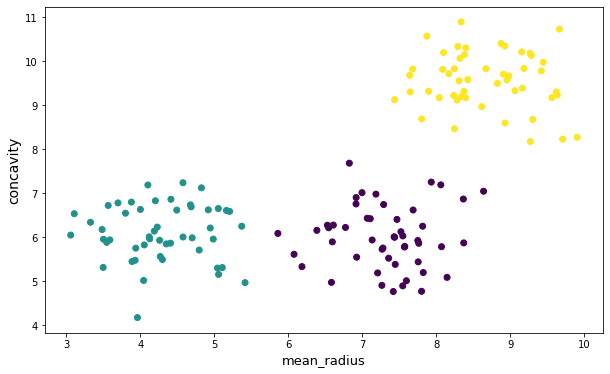

In [327]:
plt.figure(figsize=(10,6))
plt.scatter(cancer['mean_radius'],cancer['concavity'], c=y)
#plt.scatter(cancer['mean_radius'],cancer['concavity'],c=y)
plt.xlabel('mean_radius',fontsize=13)
plt.ylabel("concavity",fontsize=14)
plt.show()

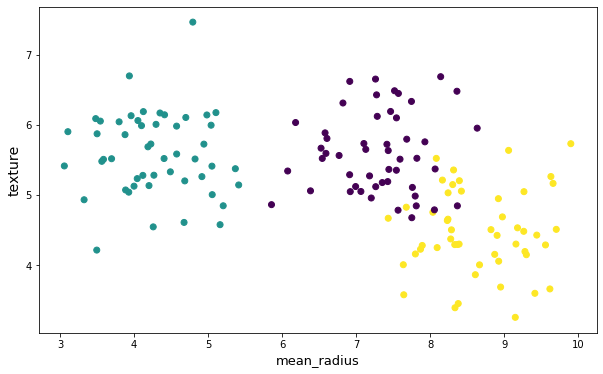

In [328]:
plt.figure(figsize=(10,6))
plt.scatter(cancer['mean_radius'],cancer['texture'], c=y)
plt.xlabel('mean_radius',fontsize=13)
plt.ylabel("texture",fontsize=14)
plt.show()

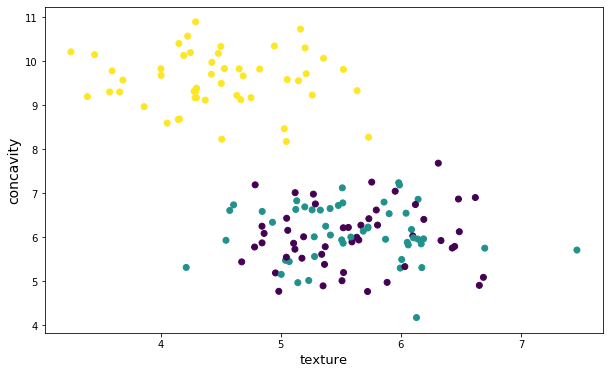

In [329]:
plt.figure(figsize=(10,6))
plt.scatter(cancer['texture'],cancer['concavity'], c=y)
plt.xlabel('texture',fontsize=13)
plt.ylabel("concavity",fontsize=14)
plt.show()

<h2> Regression vs. Classification Problems</h2>

Both regression and classification problems fall under the supervised learning realm. 

Generally, problems with a <i> quantitative</i> response variable are referred to as <b> regression problems</b> and those with a <i>qualitative</i> response variable are referred to as <b> classification problems</b>.

Examples of:
<ul>
    <li> <b>quantiative variables:</b> age, height, weight, average gpa, yearly income, blood pressure etc.</li>
    <li><b>qualitative variables:</b> gender, race, spam email (yes/no), credit card fraud (ye/no) etc.</li> 
</ul>

<h2> Assesing Model Accuracy</h2>

Because there is no one best model that works for all data sets, in practice, it is very important and often very challenging to select the best model for a given dataset. 

In order to be able to select one model over another, it is crutial to have a quantiative way of measuring the models performance and quality of fit. In other words, for a given observation, we need a way to quantify how close the predicted response is to the true response.

<h3>Regression Setting</h3>

One widely used measure in the regression setting is the <i> mean squared error</i> (MSE):

$$MSE=\frac{1}{n}\sum_{i=1}^n\left(y_i-\widehat y_i\right)^2$$

where $y_i$ is the true response and $\widehat y_i$ is the prediction that $\widehat f$ gives for the the observation $x_i$;
that is $\widehat y_i=\widehat f(x_i)$.

A small MSE indicated that the true and predicted response are close to each other, on the other hand, if some of the predicted responses are far away from the true ones, MSE will tend to be large. 

<h4> Training vs. Test MSE</h4>

Training MSE is measured using the training dataset, whereas test MSE is measured using observations which have not previously been seen by the model. 

In practice, we care about the performance of our model on previously unseen data, hence <b> test MSE</b> is what should be used. 

Selecting a model based on <b> training MSE</b> can lead to extremely poor performance, as training MSE and test MSE may behave very differently. Specifically, a model with very low <b> training MSE</b> may have a very large <b>test MSE</b>(which is what we really care about).

Let's discuss the graphs below which illustrate this phenomenon:

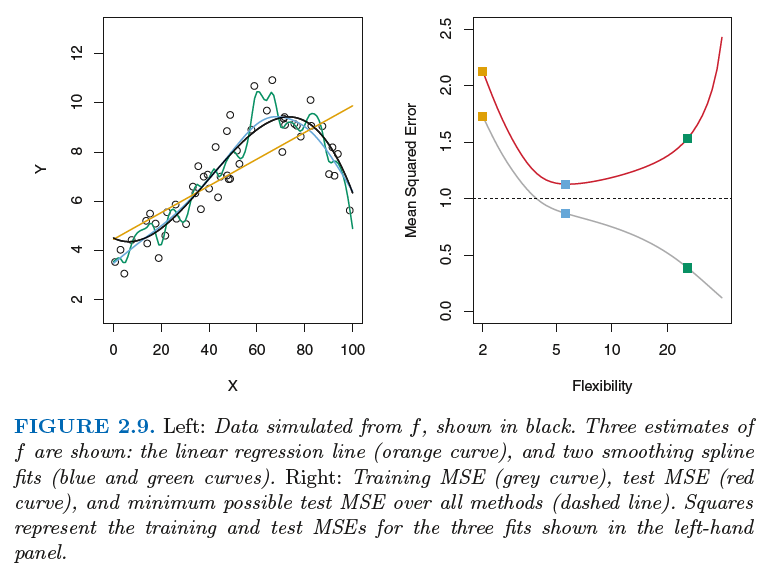

<br>

<h3>Classification Setting</h3>

<ul>
    <li> <b>Confustion Matrix</b></li>
    
  A confusion matrix is a simple and neat way of portraying how well our algorithm is doing at classifying the data.
  
  <b> Example:</b> Suppose we want to classify credit card transactions as <i> fradulent</i> or <i> normal(non-fradulent)</i> based on a certain number of features we have used to train our algorithm on. 
  
We will designate <i> normal</i> as our positive class and <i> fradu</i> as the negative class.

<b> Notation:</b>
<ul>
    <li> <b>TP</b>= True Positive</li>
    <li><b>TN</b>=True Negative</li>
    <li><b>FP</b>=False Positive</li>
    <li><b>FN</b>=False Negative</li>
</ul>
    
   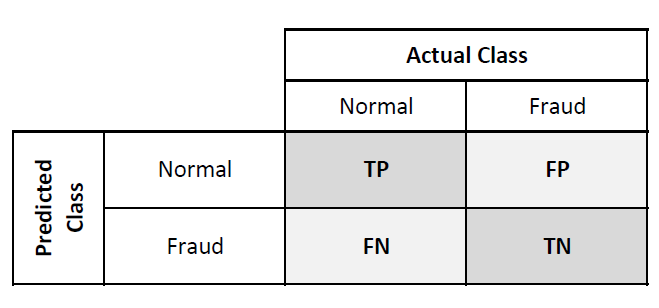
   
   
Depnding on the situation and the type of problem, we may be in some or all of the following measures:

<br>
<ul>
    
 <li> <b> Accuracy Rate:</b> $$\frac{TP+TN}{Total} \text{ where }\, Total=TP+TN+FP+FN$$</li>
 
 <li><b> Error Rate:</b> $$ 1-\frac{TP+TN}{Total}$$</li>
    
  <li><b> True Positive Rate or Recall:</b> $$\frac{TP}{TP+FN}$$</li>
  
  <li><b>False Positive Rate:</b> $$\frac{FP}{FP+TN}$$</li>
    <br>
  <li><b> Precision (if the algorithm predicts Normal, how often is it correct?):</b> 
    
  $$\frac{TP}{TP+FP}$$</li>
 
</ul>

<hr>
<br>
<font color='red' size='4'>Group Discussion</font>: Considering the credit-card fraud example, which of these measured do you think would be of most interest, and why? Specifically, would <b> accuracy</b> be a good choice for measuring the models performance?
<hr>
</ul>

<h2> Bias-Variance Trade-Off</h2>

In every machine learning model there are always two competing properties that are at war with each other, namely <b> bias</b> and <b>variance</b> of the model.

Suppose there is a relationship between the predictor $X$ and the response $Y$, $$y=f(x)+\epsilon$$ and that using a machine learning model and some training set we estimate this relationship, that is $$\widehat y=\widehat f(x)$$

Now, given a new observation $x_0$, the error we observe in our model for this observation is:$$\widehat f(x_0)-f(x_0)-\epsilon$$

It is very important to notice that this erro, among other things, also depends on the training set that was used to estimate $f$. A good and roboust model would give good predictions regardless of what training set was used to compute $\widehat f$. 

Hence, we can talk about the <i> average </i> error incurred due to possible different estimates of $f$ using different training sets. 

That is, the average <i> test MSE</i> for a given new observation $x_0$ can always be decomposed into the following three components 

$$E\left[\left(\widehat f(x_0)-f(x_0)-\epsilon\right)^2\right]=\left(Bias \widehat f(x_0)\right)^2+Var\left(\widehat f(x_0)\right)+Var(\epsilon)$$

So, a great model is one that has <b> low bias</b> and <b>low variance</b>.

What do we exactly mean by <b> variance</b> and <b>bias</b> of a ML model?

<ul>
    <li><b> Bias of a ML model </b> refers to the error that is introduced by approximating a complex real-life problem by a simpler model. For example, approximating a real-life situation by a linear regression introduces bias, as it assumes that there is a linear relationship between predictors and the response, which may not necessarily be the case</li>
    <li><b> Variance of a ML model </b> refers to the amount by which $\widehat f$ would change if we estimated it using different training sets. </li>
 </ul>

The following picture gives a good pictorial representation of this dynamic.

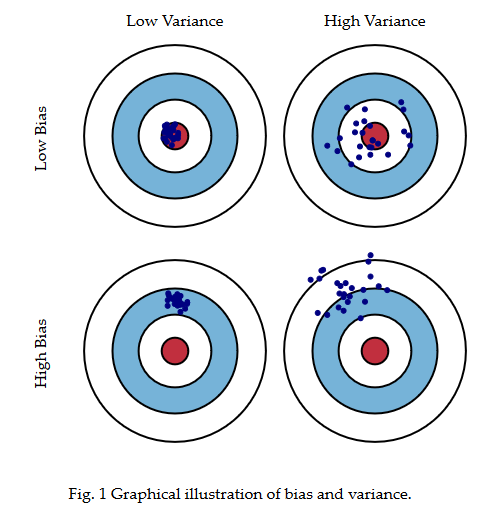

As a rule of thumb, the more complex and flexible a model is the higher the variance and the lower the bias and vice versa, the less flexible and simple a model the higher the bias and the lower the variance. This dynamic of bias-variance is the reason why <i> test MSE</i> is always U-shaped, as is illustrated in the graph below.

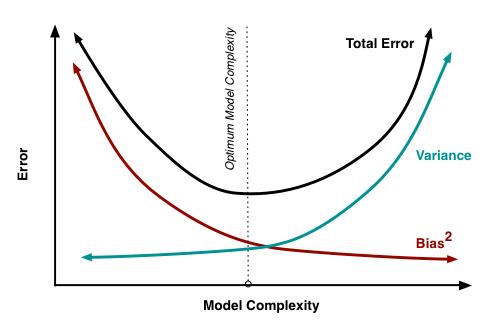